<a href="https://colab.research.google.com/github/lblogan14/Python_Deep_Learning/blob/master/ch2_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example
To implement a simple network with two hidden units and logistic function:

In [0]:
import matplotlib.pyplot as plt
import numpy

In [0]:
weight_value = 1000

# modify to change where the step function starts
bias_value_1 = 5000

# modify to change where the step function ends
bias_value_2 = -5000

The step function starts at -5.0 and ends at 5.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


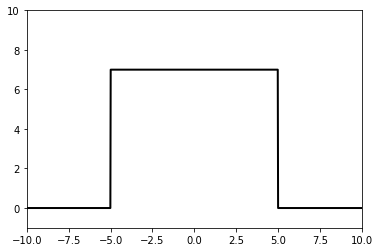

In [3]:
plt.axis([-10, 10, -1, 10])

print('The step function starts at {0} and ends at {1}'.format(-bias_value_1/weight_value,
                                                               -bias_value_2/weight_value))

inputs = numpy.arange(-10, 10, 0.01)
outputs = list()

# iterate over a range of inputs
for x in inputs:
  y1 = 1.0 / (1.0 + numpy.exp(-weight_value * x - bias_value_1))
  y2 = 1.0 / (1.0 + numpy.exp(-weight_value * x - bias_value_2))
  
  # modify to change the height of the step function
  w = 7
  
  # network output
  y = y1 * w - y2 * w
  
  outputs.append(y)
  
plt.plot(inputs, outputs, lw=2, color='black')
plt.show()

#Nerual Network for the XOR Function
Create a simple network with one hidden layer solving the XOR function, which is linearly inseparable.

In [0]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.colors import ListedColormap

1. Define the activation function and its derivative (here using `tanh(x)`)

In [0]:
def tanh(x):
  return (1.0 - numpy.exp(-2*x)) / (1.0 + numpy.exp(-2*x))

def tanh_derivative(x):
  return (1 + tanh(x)) * (1 - tanh(x))

2. Define the `NeuralNetwork` class

epochs: 0.0
[0 0] 0.31634987228520156
[0 1] 0.38455314510086014
[1 0] 0.49960366414001517
[1 1] 0.5470092417007291
epochs: 1.0
[0 0] 0.10110562119575021
[0 1] 0.4983062530300437
[1 0] 0.5483740117095983
[1 1] 0.6358128781126651
epochs: 2.0
[0 0] 0.07164948329787552
[0 1] 0.8610758132814952
[1 0] 0.8502850626450229
[1 1] 0.07158530421971639
epochs: 3.0
[0 0] 0.01758656789925367
[0 1] 0.966663773401989
[1 0] 0.9651222166853127
[1 1] 0.011468668342141863
epochs: 4.0
[0 0] -0.0017118993569207345
[0 1] 0.9815292663780985
[1 0] 0.9828812324283913
[1 1] -0.0003037091869647862
epochs: 5.0
[0 0] 0.0026985374081322524
[0 1] 0.9885083594808965
[1 0] 0.9891298042443863
[1 1] 0.015552778145753128
epochs: 6.0
[0 0] 0.005625211435815758
[0 1] 0.9922099656276941
[1 0] 0.9915443580479175
[1 1] 0.01694332658239157
epochs: 7.0
[0 0] 0.0019544398675402134
[0 1] 0.9934850143000605
[1 0] 0.9934672674082785
[1 1] 0.0007886110283729943
epochs: 8.0
[0 0] 0.0036493566842660274
[0 1] 0.9950489745378326
[1 0] 0.9

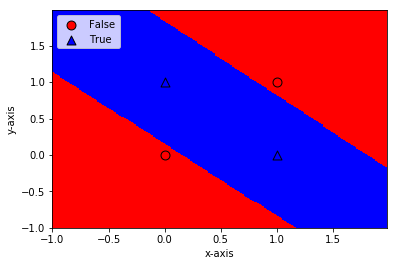

In [37]:
class NeuralNetwork:
  
  # net_arch consists of a list of integers, 
  # indicating the number of neurons in each layer
  
  def __init__(self, net_arch):
    self.activation_func = tanh
    self.activation_derivative = tanh_derivative
    self.layers = len(net_arch)
    self.steps_per_epoch = 1000
    self.net_arch = net_arch
    
    # initialize the weights with random values in the range (-1,1)
    self.weights = []
    for layer in range(len(net_arch) - 1):
      w = 2 * numpy.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
      self.weights.append(w)
      
  def fit(self, data, labels, learning_rate=0.1, epochs=10):
    '''
    :param data = data is the set of all possible pairs of booleans
                  True or False indicated by the integers 1 or 0
                  labels is the result of the logical operation XOR
                  on each of those input pairs
    :param labels = array of 0/1 for each datum
    '''
    
    # add bias units to the input layer
    ones = numpy.ones((1, data.shape[0]))
    Z = numpy.concatenate((ones.T, data), axis=1)
    training = epochs * self.steps_per_epoch
    for k in range(training):
      if k % self.steps_per_epoch == 0:
        print('epochs: {}'.format(k / self.steps_per_epoch))
        for s in data:
          print(s, self.predict(s))
          
      sample = numpy.random.randint(data.shape[0])
      y = [Z[sample]]
      
      for i in range(len(self.weights) - 1):
        activation = numpy.dot(y[i], self.weights[i])
        activation_f = self.activation_func(activation)
        # add the bias for the next layer
        activation_f = numpy.concatenate((numpy.ones(1), numpy.array(activation_f)))
        y.append(activation_f)
        
      # last layer
      activation = numpy.dot(y[-1], self.weights[-1])
      activation_f = self.activation_func(activation)
      y.append(activation_f)
      
      # error for the output layer
      error = labels[sample] - y[-1]
      delta_vec = [error * self.activation_derivative(y[-1])]
      
      # accumulate errors backwards
      for i in range(self.layers - 2, 0, -1):
        error = delta_vec[-1].dot(self.weights[i][1:].T)
        error = error * self.activation_derivative(y[i][1:])
        delta_vec.append(error)
        
      # reverse the order
      delta_vec.reverse()
      
      #backpropagation
      '''
      1. multiply its output delta and input activation to get the gradient of weight
      2. substract a ratio (percentage) of the gradient from the weight
      '''
      for i in range(len(self.weights)):
        layer = y[i].reshape(1, self.net_arch[i] + 1)
        
        delta = delta_vec[i].reshape(1, self.net_arch[i + 1])
        self.weights[i] += learning_rate * layer.T.dot(delta)
        
  def predict(self, x):
    val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
    for i in range(0, len(self.weights)):
      val = self.activation_func(numpy.dot(val, self.weights[i]))
      val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
      
    return val[1]
  
  def plot_decision_regions(self, X, y, points=200):
    markers = ('o', '^')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    resolution = max(x1_max - x1_min, x2_max - x2_min) / float(points)
    
    xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min, x1_max, resolution),
                              numpy.arange(x2_min, x2_max, resolution))
    
    input = numpy.array([xx1.ravel(), xx2.ravel()]).T
    Z = numpy.empty(0)
    for i in range(input.shape[0]):
      val = self.predict(numpy.array(input[i]))
      if val < 0.5:
        val = 0
      if val >= 0.5:
        val = 1
      Z = numpy.append(Z, val)
      
    Z = Z.reshape(xx1.shape)
    
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    classes = ['False', 'True']
    
    for idx, cl in enumerate(numpy.unique(y)):
      plt.scatter(x = X[y==cl, 0],
                  y = X[y==cl, 1],
                  alpha = 1.0,
                  c = colors[idx],
                  edgecolors = 'black',
                  marker = markers[idx],
                  s = 80,
                  label = classes[idx])
      
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc='upper left')
    plt.show()
    
if __name__ == '__main__':
  numpy.random.seed(0)
  
  # initialize the NeuralNetwork with 2 inputs, 2 hidden, and 1 output neurons
  nn = NeuralNetwork([2, 2, 1])
  
  X = numpy.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
  y = numpy.array([0, 1, 1, 0])
  
  nn.fit(X, y, epochs=10)
  
  print('Final prediction')
  for s in X:
    print(s, nn.predict(s))
    
  nn.plot_decision_regions(X, y)

* `__init__` initializes the neural networks and `net_arch` is a one-dimensional array containing the number of neurons for each layer.
* The network weights are initialized with random values between [-1, 1].
* a random sample is selected from the training set and propagated forward throught the network to calculate the error between the output and the target.
* Once the error is obtained, it can be propagated backward to update the weights with stocahstic gradient descent

Networks with different architectures can produce different separating regions. The default network set in the `NeuralNetwork` class is `net_arch=[2, 2, 1]`.

If the architecture of network is `[2, 6, 3, 1]` meaning a 3-layer neural network with 6 neurons in first hidden layer and 3 neurons in the second hidden layer.

In [0]:
X = numpy.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])
y = numpy.array([0, 1, 1, 0])

epochs: 0.0
[0 0] -0.26974445631427635
[0 1] -0.15219656736874876
[1 0] -0.17271962298801052
[1 1] -0.1590418397758719
epochs: 1.0
[0 0] -0.041734579644269576
[0 1] 0.9253514998090129
[1 0] 0.9617554390903571
[1 1] -0.060667607028594056
epochs: 2.0
[0 0] 0.08372821854662756
[0 1] 0.984151695953317
[1 0] 0.9912933031585588
[1 1] 0.03995547595458207
epochs: 3.0
[0 0] 0.029837774848890584
[0 1] 0.9909866423059221
[1 0] 0.9943274790931298
[1 1] 0.005814735402071522
epochs: 4.0
[0 0] -0.008610799791990044
[0 1] 0.9934382387832077
[1 0] 0.9961960374218689
[1 1] -9.6825882676226e-05
epochs: 5.0
[0 0] -0.003521980531666846
[0 1] 0.9951955707308058
[1 0] 0.9967485518138721
[1 1] -0.021249040385942657
epochs: 6.0
[0 0] -0.03808280999810008
[0 1] 0.9960496055024176
[1 0] 0.9974494680570635
[1 1] -0.02852492602667503
epochs: 7.0
[0 0] 0.06016004278780042
[0 1] 0.9969958887525493
[1 0] 0.9978942537546279
[1 1] -0.021691302212695666
epochs: 8.0
[0 0] 0.0487351207464609
[0 1] 0.9974711695101132
[1 0]

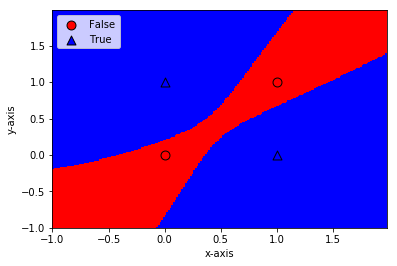

In [39]:
nn2 = NeuralNetwork([2,6,3,1])
nn2.fit(X, y, epochs=10)
nn2.plot_decision_regions(X, y)

epochs: 0.0
[0 0] 0.5726349151447196
[0 1] -0.03317963731552788
[1 0] 0.09099068946265666
[1 1] -0.47079959300686786
epochs: 1.0
[0 0] 0.0910218465213074
[0 1] 0.9111255103012432
[1 0] 0.848492934302901
[1 1] -0.008742252895677462
epochs: 2.0
[0 0] 0.014681411928423675
[0 1] 0.9710339298348664
[1 0] 0.9636899281491984
[1 1] -0.016792362042335102
epochs: 3.0
[0 0] 4.838349315813671e-05
[0 1] 0.9847164800896431
[1 0] 0.9810681335579957
[1 1] 0.01246415711563782
epochs: 4.0
[0 0] -0.0005847681941720741
[0 1] 0.9896505766117173
[1 0] 0.9876490741459665
[1 1] 0.002853457897653996
epochs: 5.0
[0 0] 0.005539874414460294
[0 1] 0.9922242554210602
[1 0] 0.9913937993631492
[1 1] 0.01945476083628835
epochs: 6.0
[0 0] 0.0008522702489549646
[0 1] 0.9939513693092906
[1 0] 0.993196024158789
[1 1] 0.013955751622670844
epochs: 7.0
[0 0] 0.00199075574044996
[0 1] 0.9950634791777201
[1 0] 0.9942885586065661
[1 1] 0.004231551461078023
epochs: 8.0
[0 0] -0.0020288207136695126
[0 1] 0.995725558142105
[1 0] 0

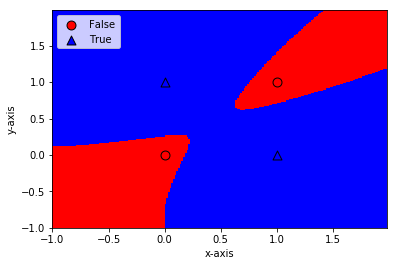

In [40]:
nn3 = NeuralNetwork([2,6,1])
nn3.fit(X, y, epochs=10)
nn3.plot_decision_regions(X, y)